In [10]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from glob import glob
from datetime import datetime, timedelta

list_of_maps = sorted(glob('/Odyssey/public/data_challenge_ssh_ose/data/maps/NeurOST_SSH-SST_allsat-alg/NeurOST_SSH-SST_allsat-alg_*_20240115.nc'))

In [11]:
size_grid="4th"
# Import reference grid 
map_xth = "/Odyssey/private/t22picar/data/ssh_L4/SSH_L4_CMEMS_2010-01-01-2024-01-01_4th_drifter.nc"
map_xth = xr.open_dataset(map_xth).sel(time="2010-01-01")
lat_ref = map_xth.lat.values
lon_ref = map_xth.lon.values

In [12]:
maps = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
start_date = "2019-01-01"
end_date = "2019-12-31"
maps = maps.sel(time=slice(start_date, end_date))

In [13]:
maps.coords['longitude'] = (maps.coords['longitude'] + 180) % 360 - 180
maps = maps.sortby(maps.longitude)
maps = maps.rename({"latitude": "lat"})
maps = maps.rename({"longitude": "lon"})
maps = maps.transpose('time','lat','lon')

In [14]:
start_date = datetime(2019, 1, 1)
end_date = datetime(2020, 1, 1)
str_save_file = f"_{size_grid}.nc"
current_date = start_date
time_index=0

save_path = f"/Odyssey/private/t22picar/multivar_uv/rec/neurost_sst_ssh_15m_{size_grid}/daily/"

if not os.path.exists(save_path):
    os.makedirs(save_path)
    print(f"Directory '{save_path}' created.")
else:
    print(f"Directory '{save_path}' already exists.")

Directory '/Odyssey/private/t22picar/multivar_uv/rec/neurost_sst_ssh_15m_4th/daily/' created.


In [15]:
# Boucle temporelle pour ajouter des données
while current_date < end_date:
    map_i = maps.sel(time=current_date).drop_vars("sla").drop_vars("adt").drop_vars("vgosa").drop_vars("ugosa")
    date_i = current_date.strftime("%Y-%m-%d")
    print(date_i)
     
    map_i = map_i.interp({"lat":lat_ref, "lon":lon_ref}, method="linear")
    save_file = f"unet_rec_{size_grid}_{date_i}"
    map_i.to_netcdf(save_path+save_file)
    current_date += timedelta(days=1)


2019-01-01
2019-01-02
2019-01-03
2019-01-04
2019-01-05
2019-01-06
2019-01-07
2019-01-08
2019-01-09
2019-01-10
2019-01-11
2019-01-12
2019-01-13
2019-01-14
2019-01-15
2019-01-16
2019-01-17
2019-01-18
2019-01-19
2019-01-20
2019-01-21
2019-01-22
2019-01-23
2019-01-24
2019-01-25
2019-01-26
2019-01-27
2019-01-28
2019-01-29
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-09
2019-02-10
2019-02-11
2019-02-12
2019-02-13
2019-02-14
2019-02-15
2019-02-16
2019-02-17
2019-02-18
2019-02-19
2019-02-20
2019-02-21
2019-02-22
2019-02-23
2019-02-24
2019-02-25
2019-02-26
2019-02-27
2019-02-28
2019-03-01
2019-03-02
2019-03-03
2019-03-04
2019-03-05
2019-03-06
2019-03-07
2019-03-08
2019-03-09
2019-03-10
2019-03-11
2019-03-12
2019-03-13
2019-03-14
2019-03-15
2019-03-16
2019-03-17
2019-03-18
2019-03-19
2019-03-20
2019-03-21
2019-03-22
2019-03-23
2019-03-24
2019-03-25
2019-03-26
2019-03-27
2019-03-28
2019-03-29
2019-03-30
2019-03-31
2019-04-01

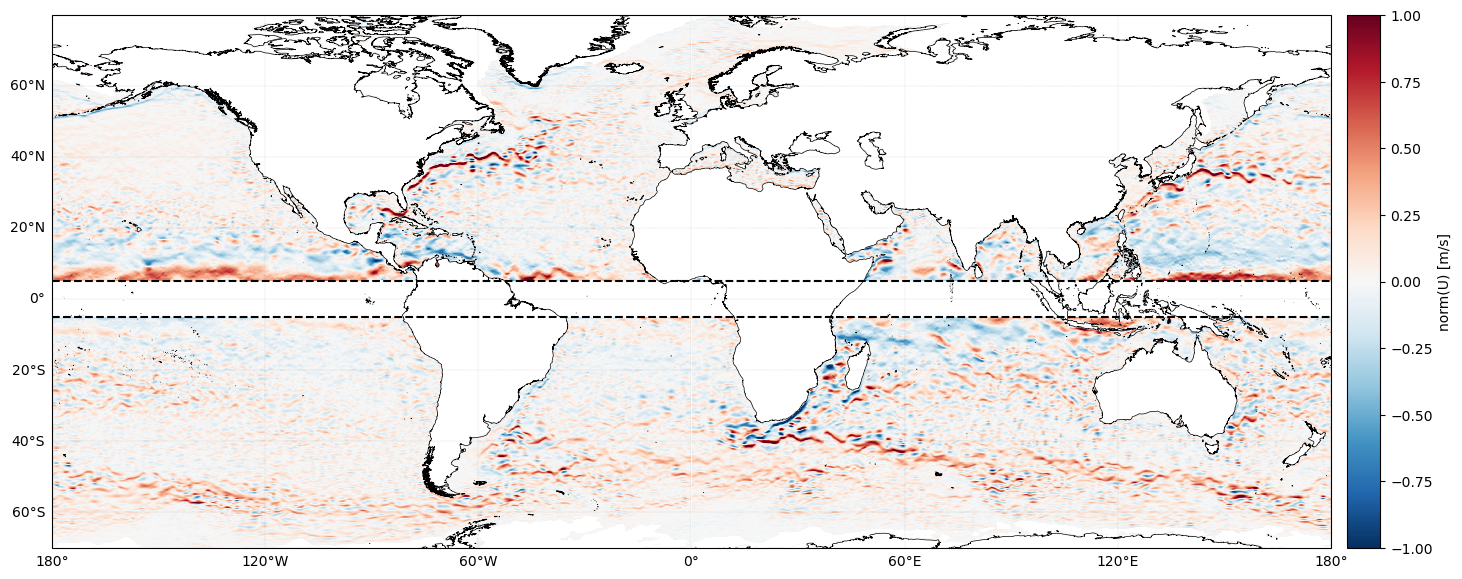

In [22]:
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_uv_map

plot_uv_map(map_i.ugos,map_i.lon,map_i.lat)